In [1]:
import torchvision.models as models
import torch
import torch.nn as nn
import torch.optim as optim
import time

from matplotlib import pyplot as plt
from torchvision import datasets, transforms as trans
from torch.utils.data import DataLoader
from pytorch_dataset import HatsDataset
from tqdm.notebook import tqdm

In [2]:
in_channel = 3
num_class = 15
learning_rate = 1e-4
batch_size = 16
num_epochs = 50

reload = ""
'Checkpoints/Res50 16B 40eP HatsOnly.pt'

'Checkpoints/Res50 16B 40eP HatsOnly.pt'

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# transform = trans.Compose(
#     [trans.Resize(256), trans.CenterCrop(224), trans.PILToTensor(), trans.ConvertImageDtype(torch.float)])
# dataset = datasets.ImageNet(".", split="train", transform=transform)
transform = trans.Compose([
    trans.ToTensor(),
    trans.RandomCrop(256, padding=3, padding_mode='constant'),
    trans.RandomHorizontalFlip(),

    trans.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

subject = 'HumanOnly'
dataset = HatsDataset(csv_file='FinalData/' + subject + '.csv',
                      root_dir='FinalData/' + subject,
                      transform=transform)  #8778

print(len(dataset))

# transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
divider = round(len(dataset) * 0.8)
train_set, test_set = torch.utils.data.random_split(dataset, [divider, len(dataset) - divider])
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

refresh_rate = round(divider / batch_size / 4)

classes = ('baseballcap', 'BikeHelmet', 'BucketHat', 'CowboyHat',
           'FeltHat', 'FireFighterHat', 'FlatCap', 'GraduationCap', 'Heaterhat', 'MilitaryHelmet',
           'MotorCycle Helmet', 'Police Hat', 'SateftyHelmet', 'TopHat', 'beanie')

1639


In [4]:
# net = resnet50()
model_name = "Trans_" + "resnet50"
model = models.resnet50(pretrained=True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
losses = []
model
model.fc = nn.Linear(model.fc.in_features, num_class)

In [5]:
if reload:
    path = reload
    checkpoint = torch.load(path)

    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    ep = checkpoint['epoch']
    losses = checkpoint['losses']

    # train_set = checkpoint['train_set']
    # test_set = checkpoint['test_set']
    # train_loader = checkpoint['train_loader']
    # test_loader = checkpoint['test_loader']

In [6]:
# https://androidkt.com/modify-pre-train-pytorch-model-for-finetuning-and-feature-extraction/
# VGG uses https://github.com/WZMIAOMIAO/deep-learning-for-image-processing/blob/master/pytorch_object_detection/faster_rcnn/backbone/vgg_model.py
# Transfer Learning https://www.analyticsvidhya.com/blog/2021/06/transfer-learning-using-vgg16-in-pytorch/
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

  0%|          | 0/50 [00:00<?, ?it/s]

 1.   20-loss:2.705 ||   40-loss:2.661 ||   60-loss:2.670 ||   80-loss:2.659 || Lasted 0m 36s, Remaining 29.1m
 2.   20-loss:2.621 ||   40-loss:2.610 ||   60-loss:2.607 ||   80-loss:2.593 || Lasted 0m 33s, Remaining 26.4m
 3.   20-loss:2.567 ||   40-loss:2.531 ||   60-loss:2.543 ||   80-loss:2.518 || Lasted 0m 33s, Remaining 25.9m
 4.   20-loss:2.484 ||   40-loss:2.466 ||   60-loss:2.460 ||   80-loss:2.453 || Lasted 0m 33s, Remaining 25.3m
 5.   20-loss:2.424 ||   40-loss:2.429 ||   60-loss:2.388 ||   80-loss:2.355 || Lasted 0m 33s, Remaining 24.8m
 6.   20-loss:2.352 ||   40-loss:2.295 ||   60-loss:2.313 ||   80-loss:2.304 || Lasted 0m 33s, Remaining 24.2m
 7.   20-loss:2.242 ||   40-loss:2.241 ||   60-loss:2.217 ||   80-loss:2.243 || Lasted 0m 33s, Remaining 23.7m
 8.   20-loss:2.213 ||   40-loss:2.148 ||   60-loss:2.156 ||   80-loss:2.117 || Lasted 0m 33s, Remaining 23.1m
 9.   20-loss:2.072 ||   40-loss:2.052 ||   60-loss:2.109 ||   80-loss:2.074 || Lasted 0m 33s, Remaining 22.6m
1

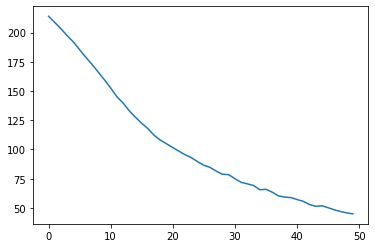

In [7]:
for epoch in tqdm(range(num_epochs)):  # loop over the dataset multiple times

    since = time.time()
    running_loss = 0.0
    loss_sum = 0.0
    print(f'{epoch + 1:2d}.', end=" ")
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        # forward + backward + optimize
        # with torch.cuda.amp.autocast():
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % refresh_rate == refresh_rate - 1:  # print every 2000 mini-batches
            print(f'{i + 1:4d}-loss:{running_loss / refresh_rate:.3f}', end=" ||")
            loss_sum += running_loss
            running_loss = 0.0
    time_elapsed = time.time() - since
    print('Lasted {:.0f}m {:.0f}s, Remaining {:.1f}m'.format(time_elapsed // 60, time_elapsed % 60,
                                                             time_elapsed / 60 * (num_epochs - epoch - 1)))
    losses.append(loss_sum)

print('Finished Training')
plt.plot(losses)

In [12]:
test = False
if test:
    subject = 'HatsOnly'
    dataset = HatsDataset(csv_file='FinalData/' + subject + '.csv',
                          root_dir='FinalData/' + subject,
                          transform=transform)  #8778

    print(len(dataset))

    # transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
    divider = round(len(dataset) * 0.8)
    train_set, test_set = torch.utils.data.random_split(dataset, [divider, len(dataset) - divider])
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

7138


In [13]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)

        # images = images.cuda()
        # labels = labels.cuda()
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'{batch_size} batches, {num_epochs} Epochs')
print(f'Accuracy of the network on the validation images: {100 * correct // total} %')

16 batches, 50 Epochs
Accuracy of the network on the validation images: 53 %


In [9]:
torch.save({
    'epoch': len(losses),
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'losses': losses,
    'train_set': train_set,
    'test_set': test_set,
    'train_loader': train_loader,
    'test_loader': test_loader
}, 'Checkpoints/' + model_name + " " + str(batch_size) + 'B ' + str(len(losses)) + 'eP ' + subject + '.pt')